# Remarks on Plotting: matplotlib (and others)

- **Prerequisites:**
  - Basic Python knowledge
  - Basic NumPy knowledge
  

- **Objectives:**
  - matplotlib: understand the anatomy of a plot and the OO interface
  - Efficient plotting
    - Selected plotting libraries & tools
    - Customization & styling

---

*This is about general principles and a high-level overview. If you have specific questions, please ask.*

## What is matplotlib?

<img src="./images/matplotlib-logo.svg" alt="matplotlib" width="250.px">

[matplotlib](http://matplotlib.org/):
> Matplotlib is a Python 2D plotting library which produces publication-quality figures in a variety of hardcopy formats and interactive environments across platforms. 

**Remarks:**
- matplotlib is the standard plotting library for Python
- matplotlib is extensive and covers a lot of use cases
- pandas, scipy, statsmodels, seaborn and others use matplotlib internally

---

`matplotlib` is heavily inspired by [MATLAB's plotting routines](https://www.mathworks.com/products/matlab.html).

### But what is pyplot and pylab?


- `matplotlib` is the package


- `pyplot` is a module in `matplotlib`

  - provides a function-based interface to the underlying object-oriented lib
  - state-machine to automatically create necessary elements for a plot
  
  
- `pylab` another module installed alongside

  - provides MATLAB-like experience by automatically importing NumPy

**Recommendation:**
- Use `pyplot` to create figure and then the OO interface
- Do not use `pylab`
- `pyplot` & OOP > `pylab` because: cleaner, clearer, more transparent and more how `matplotlib` works

## What is a plot anyway?

<img src="./images/anatomy1.png" alt="anatomy" width="600.px">

### What is/makes a plot?

- **Figure:** The figure as such. Keeps track of Axes, artists and the canvas
  (does the drawing)
- **Axes:** The area where the plot itself resides. An Axes contains 2 (or 3)
  Axis objects; Axes can have a title, as well as x- and y-labels.
  Used by calling the required plotting method.
- **Axis:** Line with ticks and numbers.
- **Artist:** Everything, including `Figure`, `Axes`, `Axis`, `Text`, `Line2D`, etc.

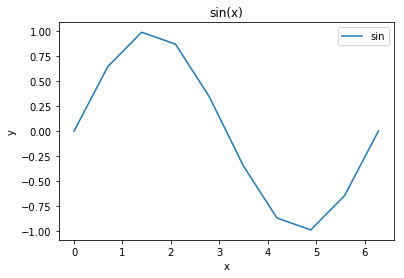

In [1]:
# Simple Plots I
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, label='sin')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('sin(x)')
ax.legend()

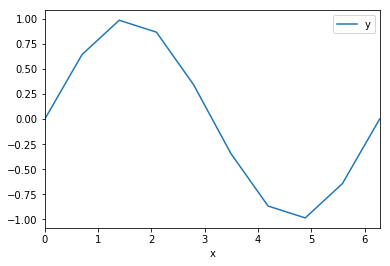

In [2]:
# Simple Plots II
import pandas as pd

df = pd.DataFrame({'x': x, 'y': y})

fig, ax = plt.subplots()
df.plot(x='x', y='y', ax=ax)  # if ax is None, a new figure is created

In [3]:
ax.lines, ax.lines[0].get_color()

([<matplotlib.lines.Line2D at 0x7f0984c7c3d0>], '#1f77b4')

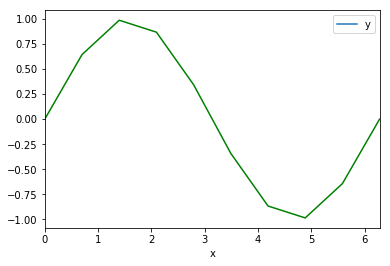

In [4]:
fig, ax = plt.subplots()
df.plot(x='x', y='y', ax=ax)  # if ax is None, a new figure is created
line = ax.lines[0]
line.set_color('green')  # you can alway change a plot...

## Notes on Efficient Plotting

### Go-to Solutions

- [matplotlib gallery](https://matplotlib.org/gallery/)
- [seaborn gallery](https://seaborn.pydata.org/examples/index.html)
- [plotnine gallery](https://plotnine.readthedocs.io/en/stable/gallery.html)
- [pandas visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Further reading:
- [matplotlib Doc / pyplot Tutorial](https://matplotlib.org/users/pyplot_tutorial.html)

# Let's take a look at the [seaborn gallery](https://seaborn.pydata.org/examples/index.html)

### A Summary of Selected Plotting Libraries/Tools

*if possible, delegate the work*

- [Seaborn: statistical data visualization](http://seaborn.pydata.org/), high-level interface, matches very well with `pandas`, based on `matplotlib`.
- [plotnine: A grammar of graphics for Python](https://github.com/has2k1/plotnine), derived from [ggplot2](http://ggplot2.org/), the grammar allows users to compose plots by explicitly mapping data to the visual objects that make up the plot, based on `matplotlib`.
- [Cartopy: A library providing cartographic tools for python](http://scitools.org.uk/cartopy/), [basemap: plotting 2D data on maps](http://matplotlib.org/basemap/), `Cartopy` took over `basemap`, `matplotlib` plotting with projections, support for shapefiles.
- [Folium: Python Data. Leaflet.js Maps](https://github.com/python-visualization/folium): interactive visualization on [Leaflet](http://leafletjs.com/) map.
- [Mayavi: 3D scientific data visualization and plotting in Python](http://docs.enthought.com/mayavi/mayavi/), `mlab` interface for `matplotlib` like experience.
- [PyQtGraph: Scientific Graphics and GUI Library for Python](http://pyqtgraph.org/), based on `PyQt`/`PySide`, very fast, includes facilities to link data, focus on interactive/GUI applications.
- [VisPy: fast, scalable, and easy to use interactive scientific visualization](http://vispy.org/): based on `OpenGL`, very fast, "forks PyQtGraph", no GUI features.
- [HoloViews: Stop plotting your data - annotate your data and let it visualize itself](http://holoviews.org/)
- [GeoViews:](http://geo.holoviews.org/) HoloViews for geographic plot types
- [Bokeh: interactive data visualization](http://bokeh.pydata.org/en/latest/), part of *PyData*, supports charts and dashboards
- [plotly: interactive data visualization](https://plot.ly/), supports charts and dashboards

### When to Use What?


- You are new to plotting with Python? Use matplotlib.

- You want to make (static) statistical plots? Take a look at seaborn or plotnine.

- You want to plot on maps, work with projetions? Use Cartopy/basemap.

- You want interactive plots or event handling in a matplotlib figure? No problem, matplotlib supports that.

- You want interactive, js-based plots in a browser? Try bokeh or plotly.


Other cases: browse through the docs of above packages and check GitHub activity, maintainers, etc. 

### Custom Plots

To create plots efficiently, it makes sense to decouple as much as possible:
- data preparation
- plotting
- styling (specification)

See the [Model–view–controller](https://en.wikipedia.org/wiki/Model%E2%80%93view%E2%80%93controller) software architectural pattern.


Notes:
- It often makes sense to maintain a separate module with style configs.
- This is adviseable for per-plot styling as well to assure coherent styling among different scripts/modules.

### Custom Styles

Numerous parameters define the appearance of a plot.

Typical examples include:
- default line colors
- fonts
- figure sizes
- ...

These can be changed manually on a per-plot basis or by defining styles for specific purposes, i.e. journal publications, project reports, etc.

We cover how to dynamically change settings, for other approache see the [docs](https://matplotlib.org/users/customizing.html).

Let's take a look...

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
# configurations are stored in
mpl.matplotlib_fname()

'/home/claus/miniconda3/envs/training/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

In [6]:
# this config is loaded into a dict (with a lot of keys)
style = mpl.rcParams.copy()  # we make a copy 
len(style), style['text.color'], style['font.size'], style['figure.figsize']

(296, 'k', 10.0, [6.0, 4.0])

In [7]:
# although we can modify `style` directly, there is a more elegant solution
# let's define a few styles:
red_text_style = {'text.color': 'r',
                  'xtick.color': 'r',
                  'ytick.color': 'r'}

small_figure_style = {'figure.figsize': [2, 1]}

blue_axes_style = {'axes.edgecolor': 'b'}

Text(0.5,1,"Outside of 'with plt.style.context(red_text_style)'")

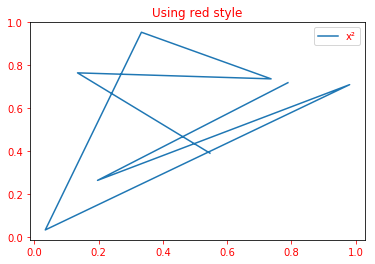

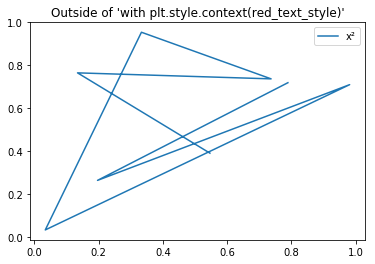

In [8]:
x, y = np.random.random(size=(2, 8))
# this allows us to temporarily change the style
# plt.style.context is a so called context manager
with plt.style.context(red_text_style):
    fig, ax = plt.subplots()
    ax.plot(x, y, label='x²')
    ax.legend()
    ax.set_title('Using red style')

fig, ax = plt.subplots()
ax.plot(x, y, label='x²')
ax.legend()
ax.set_title("Outside of 'with plt.style.context(red_text_style)'")

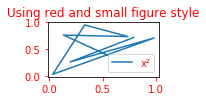

In [9]:
# configurations can be combined
# this works via dict.update, hence the last one wins
with plt.style.context([red_text_style, small_figure_style]):
    fig, ax = plt.subplots()
    ax.plot(x, y, label='x²')
    ax.legend()
    ax.set_title('Using red and small figure style')

In [10]:
# you can also save styles to files
# available styles are listed in
plt.style.available[:5]
# and can be used via 
# plt.style.use()
# or
# sns.set_style()

['seaborn-white',
 'classic',
 '_classic_test',
 'seaborn-ticks',
 'seaborn-pastel']

### Remarks

- Use a custom tick formatter for full control over tick positions and labels.


- Use `fig.savefig()` to save a figure to a file.


- Use `fig.tight_layout()` to remove white space around figures, see the [Tight Layout guide](https://matplotlib.org/users/tight_layout_guide.html).


- Use the "Configure subplots" menu in a figure interactively adjust spacing. This is the same as calling `plt.subplot_tool()`.


- Use `GridSpec`, `SubplotSpec` and `subplot2grid` utilities for custom subplots, see corresponding [guide](http://matplotlib.org/users/gridspec.html).


- Use `from matplotlib.backends.backend_pdf.PdfPages` to create PDFs.


- Use a non-interactive backend to speed up plotting.


- If you need a custom color scheme, you may take a look at [ColorBrewer](http://colorbrewer2.org/) or search for other related websites.

# Questions?